In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
bank=pd.read_csv('bank-full.csv',sep=';')
bank=bank.dropna()
bank.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21538 entries, 0 to 21537
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        21538 non-null  int64  
 1   job        21538 non-null  object 
 2   marital    21538 non-null  object 
 3   education  21538 non-null  object 
 4   default    21538 non-null  object 
 5   balance    21538 non-null  float64
 6   housing    21538 non-null  object 
 7   loan       21538 non-null  object 
 8   contact    21538 non-null  object 
 9   day        21538 non-null  float64
 10  month      21538 non-null  object 
 11  duration   21538 non-null  float64
 12  campaign   21538 non-null  float64
 13  pdays      21538 non-null  float64
 14  previous   21538 non-null  float64
 15  poutcome   21538 non-null  object 
 16  y          21538 non-null  object 
dtypes: float64(6), int64(1), object(10)
memory usage: 3.0+ MB


In [3]:
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5.0,may,261.0,1.0,-1.0,0.0,unknown,no
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5.0,may,151.0,1.0,-1.0,0.0,unknown,no
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5.0,may,76.0,1.0,-1.0,0.0,unknown,no
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5.0,may,92.0,1.0,-1.0,0.0,unknown,no
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5.0,may,198.0,1.0,-1.0,0.0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21533,38,technician,single,tertiary,no,103.0,no,no,cellular,19.0,aug,490.0,4.0,-1.0,0.0,unknown,no
21534,59,retired,married,unknown,no,613.0,no,no,cellular,19.0,aug,75.0,2.0,-1.0,0.0,unknown,no
21535,48,unknown,married,secondary,no,-95.0,no,no,cellular,19.0,aug,134.0,9.0,-1.0,0.0,unknown,no
21536,49,management,married,secondary,no,0.0,no,no,cellular,19.0,aug,141.0,2.0,-1.0,0.0,unknown,no


In [6]:
bank1=pd.get_dummies(bank,columns=['job','marital','education',
                                   'contact','poutcome','month'])
bank1

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_unknown,month_aug,month_jul,month_jun,month_may
0,58,no,2143.0,yes,no,5.0,261.0,1.0,-1.0,0.0,...,1,0,0,0,1,1,0,0,0,1
1,44,no,29.0,yes,no,5.0,151.0,1.0,-1.0,0.0,...,0,0,0,0,1,1,0,0,0,1
2,33,no,2.0,yes,yes,5.0,76.0,1.0,-1.0,0.0,...,0,0,0,0,1,1,0,0,0,1
3,47,no,1506.0,yes,no,5.0,92.0,1.0,-1.0,0.0,...,0,1,0,0,1,1,0,0,0,1
4,33,no,1.0,no,no,5.0,198.0,1.0,-1.0,0.0,...,0,1,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21533,38,no,103.0,no,no,19.0,490.0,4.0,-1.0,0.0,...,1,0,1,0,0,1,1,0,0,0
21534,59,no,613.0,no,no,19.0,75.0,2.0,-1.0,0.0,...,0,1,1,0,0,1,1,0,0,0
21535,48,no,-95.0,no,no,19.0,134.0,9.0,-1.0,0.0,...,0,0,1,0,0,1,1,0,0,0
21536,49,no,0.0,no,no,19.0,141.0,2.0,-1.0,0.0,...,0,0,1,0,0,1,1,0,0,0


In [8]:
pd.set_option("display.max.columns",None)
bank1
bank1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21538 entries, 0 to 21537
Data columns (total 38 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  21538 non-null  int64  
 1   default              21538 non-null  object 
 2   balance              21538 non-null  float64
 3   housing              21538 non-null  object 
 4   loan                 21538 non-null  object 
 5   day                  21538 non-null  float64
 6   duration             21538 non-null  float64
 7   campaign             21538 non-null  float64
 8   pdays                21538 non-null  float64
 9   previous             21538 non-null  float64
 10  y                    21538 non-null  object 
 11  job_admin.           21538 non-null  uint8  
 12  job_blue-collar      21538 non-null  uint8  
 13  job_entrepreneur     21538 non-null  uint8  
 14  job_housemaid        21538 non-null  uint8  
 15  job_management       21538 non-null 

In [9]:
bank1['default']=np.where(bank1['default'].str.contains("yes"),1,0)
bank1['housing']=np.where(bank1['housing'].str.contains("yes"),1,0)
bank1['loan']=np.where(bank1['loan'].str.contains("yes"),1,0)
bank1['y']=np.where(bank1['y'].str.contains("yes"),1,0)
bank1
bank1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21538 entries, 0 to 21537
Data columns (total 38 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  21538 non-null  int64  
 1   default              21538 non-null  int32  
 2   balance              21538 non-null  float64
 3   housing              21538 non-null  int32  
 4   loan                 21538 non-null  int32  
 5   day                  21538 non-null  float64
 6   duration             21538 non-null  float64
 7   campaign             21538 non-null  float64
 8   pdays                21538 non-null  float64
 9   previous             21538 non-null  float64
 10  y                    21538 non-null  int32  
 11  job_admin.           21538 non-null  uint8  
 12  job_blue-collar      21538 non-null  uint8  
 13  job_entrepreneur     21538 non-null  uint8  
 14  job_housemaid        21538 non-null  uint8  
 15  job_management       21538 non-null 

In [10]:
x=pd.concat([bank1.iloc[:,0:10],bank1.iloc[:,11:]],axis=1)
y=bank1.iloc[:,10]

In [11]:
classifier=LogisticRegression()
classifier.fit(x,y)

C:\Users\HP\.anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [12]:
y_pred=classifier.predict(x)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [13]:
y_pred_df=pd.DataFrame({'actual_y':y,'y_pred_prob':y_pred})
y_pred_df

,actual_y,y_pred_prob
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
21533,0,0
21534,0,0
21535,0,0
21536,0,0


In [14]:
confusion_matrix=confusion_matrix(y,y_pred)
confusion_matrix

array([[20277,   217],
       [  703,   341]], dtype=int64)

In [15]:
#model accuracy by (a+d)/(a+d+b+c)
(3900+2500)/(3900+5500+45210+2500)

0.1120644370513045

In [16]:
classifier.predict_proba(x)[:,1]

array([0.0029525 , 0.00384221, 0.00468968, ..., 0.00738688, 0.01152789,
       0.01925144])

In [17]:
classifier.coef_

array([[-6.26255050e-02,  1.98244620e-02, -9.61110720e-06,
        -4.71774579e-01, -1.93161831e-01,  1.46280727e-04,
         5.46845695e-03, -8.62791713e-02,  4.76528196e-01,
         0.00000000e+00, -6.02914518e-02, -1.50478208e-01,
         1.38535143e-02, -2.96120531e-02, -1.35277510e-01,
         9.12713047e-02, -3.31752873e-02, -1.18232746e-01,
        -1.76979288e-02, -5.29957703e-02,  2.19349882e-02,
        -5.82704789e-03,  2.12175139e-01, -3.20613698e-01,
        -3.68089637e-01,  1.99853615e-04, -2.57422298e-01,
        -1.91360677e-01, -2.79450744e-02,  3.35092351e-02,
         1.58758388e-02, -5.25913270e-01, -4.76528196e-01,
         1.26071408e-01, -1.11994589e-01, -5.48360078e-02,
        -4.35769007e-01]])

In [18]:
pd.crosstab(y_pred,y)

y,0,1
row_0,,
0,20277,703
1,217,341


In [19]:
accuracy=sum(y==y_pred)
accuracy

20618

In [20]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [21]:
Logit_roc_score=roc_auc_score(y,classifier.predict(x))
Logit_roc_score

0.6580199437869303

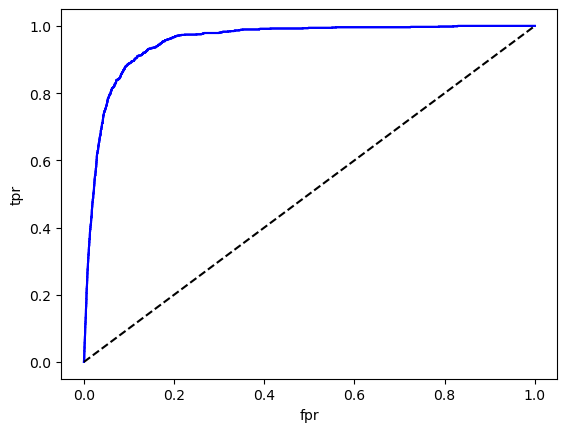

In [22]:
fpr,tpr,thresholds=roc_curve(y,classifier.predict_proba(x)[:,1])
plt.plot(fpr,tpr,color='blue')
acu=roc_auc_score(y,y_pred)

plt.plot(fpr,tpr,color='blue',label='logit model(area=%0.2f)'%Logit_roc_score)
plt.plot([0,1],[0,1],'k--')
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.show()